# Modelo de Regresión Lineal Multivariable


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Carga de datos y filtrado de variables


In [93]:
train = pd.read_csv("train.csv")  

variables_clave = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces'
]

X = train[variables_clave]
y = np.log(train['SalePrice'])


#### División entre train (70%) y test (30%)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#### Ajuste de modelo de regresión lineal


In [95]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

#### Predicción sobre el test set


In [96]:
# Predicción sobre test set
y_pred = modelo.predict(X_test)

#### Coeficiente (y = mx + c)


In [97]:
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo.coef_
})
print("Coeficientes:")
print(coef_df)

Coeficientes:
       Variable  Coeficiente
0   OverallQual     0.091581
1     GrLivArea     0.000151
2    GarageCars     0.102188
3   TotalBsmtSF     0.000045
4      1stFlrSF     0.000061
5      FullBath     0.015040
6     YearBuilt     0.002355
7  KitchenAbvGr    -0.166261
8  TotRmsAbvGrd     0.018961
9    Fireplaces     0.066622


#### Gráfico de dispersión sobre la recta de regresión


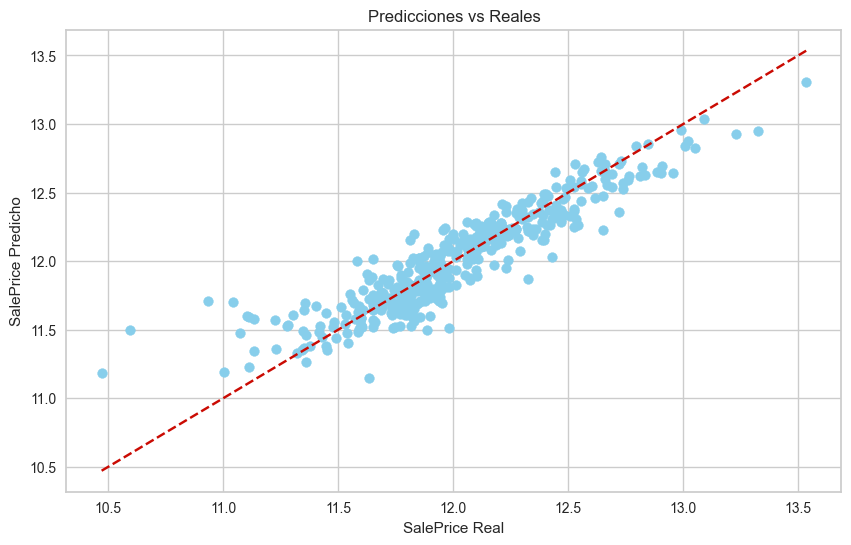

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred[:len(y_test)], color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("SalePrice Real")
plt.ylabel("SalePrice Predicho")
plt.title("Predicciones vs Reales")
plt.grid(True)
plt.show()

#### Métricas de evaluación


In [99]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("R squared: %.2f" % r2_score(y_test, y_pred))

Mean Squared Error: 0.03
R squared: 0.84


### Cálculo y muestra de residuales


In [100]:
for i in range(len(y_test)):
    print(y_test.iloc[i], y_pred[i], " --> ", "\t\tDIFF:", y_test.iloc[i] - y_pred[i])

11.947949375319936 11.790464769462119  -->  		DIFF: 0.15748460585781743
12.691580461311874 12.632217897468532  -->  		DIFF: 0.05936256384334193
11.652687407345388 11.753225788480336  -->  		DIFF: -0.10053838113494784
11.976659481202368 12.105584732624681  -->  		DIFF: -0.12892525142231293
12.661913960963405 12.59659313339531  -->  		DIFF: 0.06532082756809565
11.231887935237117 11.357681905254708  -->  		DIFF: -0.1257939700175914
12.649154617209645 12.22470436899347  -->  		DIFF: 0.42445024821617494
11.891361900690473 12.064928562627024  -->  		DIFF: -0.17356666193655101
11.344506813345266 11.352972436391116  -->  		DIFF: -0.008465623045850634
11.816726919301892 11.744094933179253  -->  		DIFF: 0.07263198612263899
11.884489021402711 11.922387670644277  -->  		DIFF: -0.03789864924156561
11.77528972943772 11.641979109934635  -->  		DIFF: 0.1333106195030851
11.302204433654575 11.610017173343607  -->  		DIFF: -0.307812739689032
12.273731294003989 12.233945495383548  -->  		DIFF: 0.039785798

#### Diferencia máxima


In [101]:
differences = [abs(t - p) for t, p in zip(y_test, y_pred)]

max_index = differences.index(max(differences))

max_real_value = y_test.iloc[max_index]
max_pred_value = y_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 197
Valor real: 10.596634733096073
Valor predicho: 11.499721441135204
Diferencia máxima: 0.9030867080391314


#### Visualización de residuales


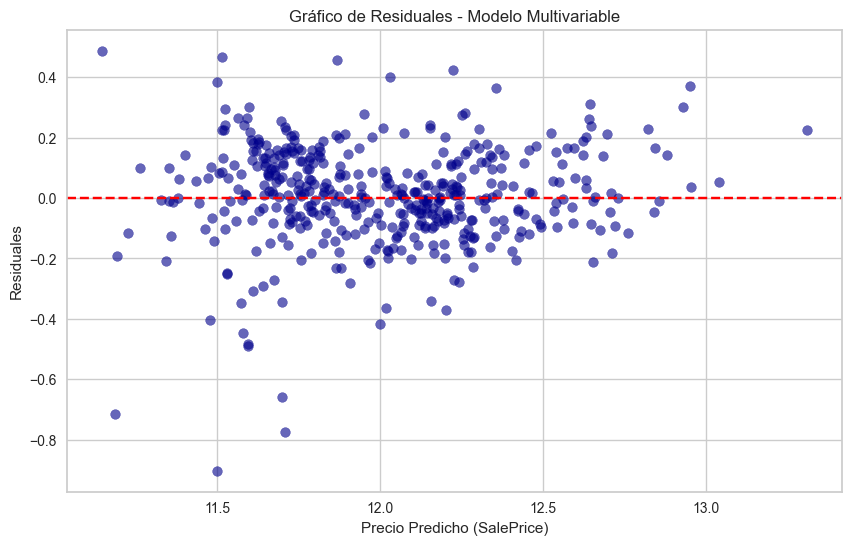

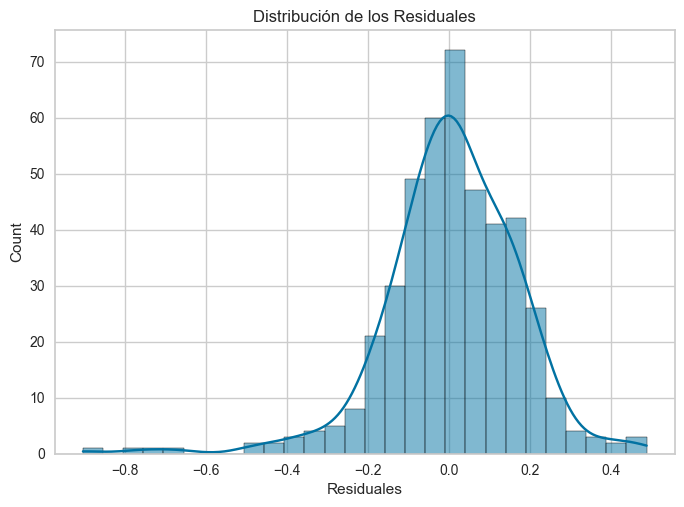

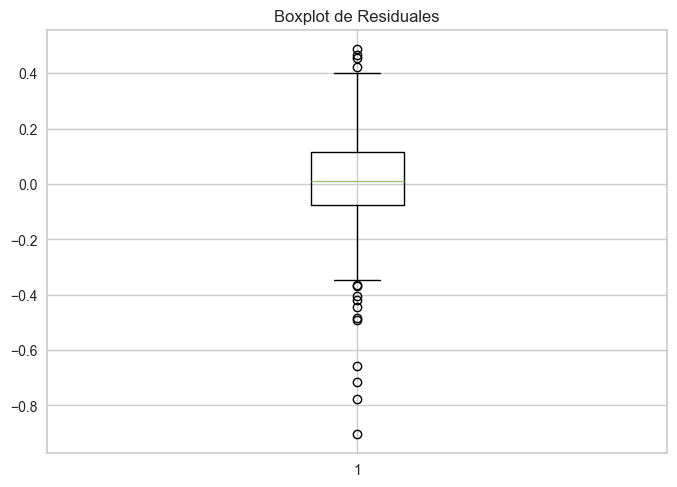

In [103]:
residuales = y_test - y_pred
len(residuales)

# Gráfico de residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuales, color='darkblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuales - Modelo Multivariable")
plt.xlabel("Precio Predicho (SalePrice)")
plt.ylabel("Residuales")
plt.grid(True)
plt.show()

# Histograma de residuales

sns.histplot(residuales, kde=True)  
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Boxplot de residuales

plt.boxplot(residuales)
plt.title("Boxplot de Residuales")
plt.show()

#### Prueba de normalidad de residuos


In [104]:
normaltest(residuales)

NormaltestResult(statistic=np.float64(97.3787556819228), pvalue=np.float64(7.152730735972233e-22))

#### Yellowbrick de residuales


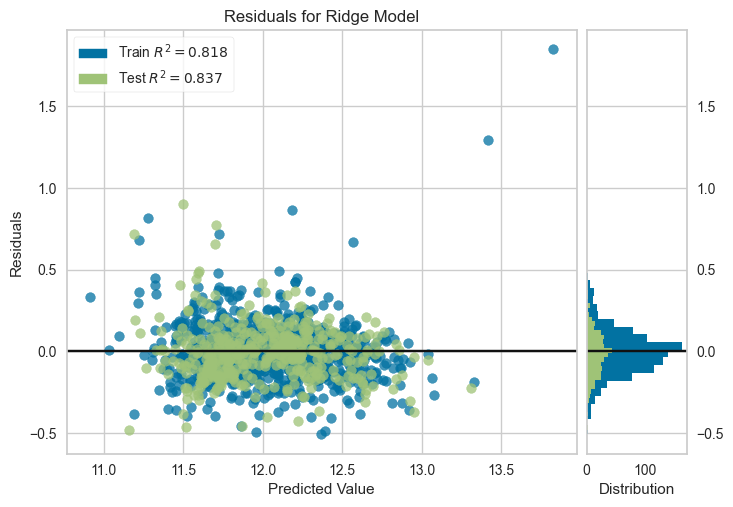

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [105]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### Análisis de coeficientes


In [106]:
X_with_const = sm.add_constant(X)
est = sm.OLS(y, X_with_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     686.0
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:25:19   Log-Likelihood:                 543.56
No. Observations:                1460   AIC:                            -1065.
Df Residuals:                    1449   BIC:                            -1007.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.1495      0.405     15.179   

#### Agregando intercepto


In [107]:
X_with_const = sm.add_constant(X) 
est = sm.OLS(y, X_with_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     686.0
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:25:21   Log-Likelihood:                 543.56
No. Observations:                1460   AIC:                            -1065.
Df Residuals:                    1449   BIC:                            -1007.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.1495      0.405     15.179   

##### Detección de overfitting


In [108]:
model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.886737   0.85815279 0.75891184 0.83111268 0.88212384]
Mean score: 0.8434076305778972


#### Análisis final de MRL Multivariable


<small>

### **Preprocesamiento**

**Transformación Logarítmica:**

En este análisis, se aplicó una transformación logarítmica a la variable objetivo _SalePrice_. Esto es una técnica común en modelos de precios, ya que ayuda a estabilizar la varianza y a mejorar la linealidad de las relaciones entre variables predictoras y la variable objetivo. Al trabajar con log(SalePrice), se logra que el modelo capture mejor las relaciones relativas (porcentuales) en vez de absolutas, algo especialmente útil en precios inmobiliarios.

### **Análisis de Coeficientes e Interpretación**

El modelo ajustado incluye 10 variables predictoras seleccionadas por su relevancia teórica y su correlación con el precio de las viviendas. El coeficiente de cada variable indica el cambio esperado en el logaritmo del precio por cada unidad de incremento en la variable, manteniendo las demás constantes.

Entre los coeficientes más relevantes se encuentran OverallQual (calidad general de la vivienda), con un impacto positivo significativo (0.0923), lo que implica que una mejor calidad estructural incrementa considerablemente el precio esperado. GarageCars muestra un efecto positivo de 0.0838, reflejando la importancia de contar con espacio de parqueo.

### **Métricas de evaluación**

El desempeño global del modelo es bueno, con un **R² de 0.84**, lo que significa que el _84% de la variabilidad del logaritmo de SalePrice_ es explicada por las variables seleccionadas. Además, el **error cuadrático medio (MSE) es de apenas 0.03**, lo que refuerza la precisión global.

### **Análisis Gráfico**

#### **Predicciones vs Valores Reales**

La primera gráfica muestra una comparativa entre los valores reales y las predicciones. En general, las predicciones _siguen una tendencia alineada a la diagonal_, lo que indica que el modelo captura bien la relación lineal global. Sin embargo, se observa cierta dispersión en las viviendas con precios más bajos, lo cual podría ser evidencia de que hay factores adicionales no capturados por el modelo que explican mejor esas propiedades más económicas, como la ubicación o el estado de conservación.

#### **Análisis de Residuales y Supuestos del Modelo**

El _análisis de residuales_ es clave para validar los supuestos de linealidad y homocedasticidad. En el gráfico de **residuales vs valores predichos**, se observa una dispersión aleatoria en torno a cero, lo cual es un buen indicador de linealidad y ausencia de patrones sistemáticos. Sin embargo, hay una ligera mayor dispersión para propiedades con precios más altos, lo que podría indicar cierta heterocedasticidad.

En la **distribución de residuales (Histograma)**, se observa una forma cercana a una campana, aunque ligeramente sesgada hacia valores negativos. Esto es consistente con la prueba de normalidad, cuyo p-valor extremadamente bajo (< 0.0001) indica que los residuales no siguen una distribución normal perfecta. A pesar de esto, en datasets inmobiliarios esto es común y no necesariamente implica un problema crítico, pero podría mejorarse utilizando transformaciones adicionales o métodos robustos.

**El boxplot de residuales** refuerza la presencia de algunos outliers, principalmente subestimaciones. Estos outliers suelen ser propiedades atípicas, con características especiales que no son bien capturadas por las variables explicativas.

### **Multicolinealidad y Estabilidad del Modelo**

El análisis de multicolinealidad revela un **número de condición de 2.76e+05**, lo cual es muy alto. Este valor indica alta colinealidad entre algunas variables predictoras, lo que podría generar inestabilidad en los coeficientes estimados. Variables como _GrLivArea, 1stFlrSF y TotRmsAbvGrd_ probablemente están correlacionadas entre sí, lo que reduce la capacidad de estimar efectos individuales con precisión.

### **Análisis de Casos Extremos**

El caso de mayor error absoluto ocurre en la propiedad con índice 197, donde el modelo subestimó el precio logarítmico por 0.903 unidades. En términos lineales, esto equivale a un error de casi el doble del precio real. Este tipo de errores extremos suelen asociarse a viviendas con características únicas o fuera de lo común, como ubicaciones premium, remodelaciones excepcionales, o características no cuantificadas en las variables seleccionadas.

### **Validación Cruzada y Generalización**

La evaluación del modelo se complementa con una validación cruzada, obteniendo un promedio de R² de 0.843 en las distintas particiones. Esto es muy cercano al R² obtenido en el conjunto completo (0.84), lo que indica que el modelo no presenta overfitting significativo. En términos prácticos, esto significa que el modelo tiene una buena capacidad de generalización, y su desempeño es consistente al ser aplicado sobre datos nuevos.

### **Conclusiones Generales**

En general, el modelo de regresión lineal multivariable muestra un desempeño sólido y satisfactorio para un primer ajuste, logrando una alta capacidad explicativa reflejada en un R² de 0.84, lo cual es un valor bastante competitivo en contextos de modelado inmobiliario, donde los precios de las viviendas suelen estar influenciados por múltiples factores difíciles de capturar completamente. Adicionalmente, la comparación entre el desempeño en el set de entrenamiento y los resultados obtenidos mediante validación cruzada demuestra que el modelo posee una buena capacidad de generalización, al evitar el sobreajuste (overfitting), lo cual es un logro importante en modelos lineales multivariables con muchas variables explicativas.

El análisis gráfico de los residuales muestra un comportamiento razonablemente aleatorio, sin patrones sistemáticos evidentes, lo cual respalda el supuesto de linealidad entre predictores y la variable transformada (log(SalePrice)). Sin embargo, se identificaron ciertos puntos extremos (outliers) que exhiben errores significativamente mayores a los esperados. Estos casos suelen corresponder a propiedades atípicas, cuyas características únicas no son adecuadamente explicadas por las variables seleccionadas, sugiriendo que el modelo aún puede ser mejorado al incorporar variables adicionales (ubicación geográfica granular, condiciones del vecindario, o características cualitativas complejas como acabados especiales o grado de remodelación reciente).

Una de las áreas de mayor preocupación es la multicolinealidad detectada en el modelo, reflejada en un número de condición extremadamente alto. Este es un signo claro de que ciertas variables predictoras están fuertemente correlacionadas entre sí (por ejemplo, GrLivArea y 1stFlrSF, o TotRmsAbvGrd y OverallQual). Esta colinealidad afecta directamente la estabilidad de los coeficientes estimados, lo que significa que pequeñas fluctuaciones en los datos de entrada podrían provocar cambios desproporcionados en las estimaciones, restando robustez e interpretabilidad al modelo. Resolver este problema es prioritario para garantizar que el modelo sea útil tanto para predicción como para interpretación de los efectos individuales.

Otro punto importante es la prueba de normalidad de los residuales, la cual indica que estos no siguen perfectamente una distribución normal. Si bien esto puede no ser un problema crítico para la predicción per se, sí es una señal de que el modelo podría estar omitiendo alguna estructura no lineal o característica relevante de los datos. Una estrategia para abordar esto sería explorar transformaciones adicionales de algunas variables predictoras o evaluar la inclusión de términos polinomiales o de interacción, en caso de que el análisis exploratorio revele relaciones no lineales entre las variables predictoras y el precio.

Finalmente, el modelo muestra sensibilidad a ciertos segmentos del mercado, especialmente en propiedades con precios bajos o muy altos, donde las predicciones tienden a desviarse más. Esto podría indicar que las relaciones lineales asumidas por el modelo no capturan adecuadamente la complejidad de estos segmentos, lo cual podría abordarse dividiendo el mercado en clusters homogéneos (segmentación por rango de precios o tipo de propiedad) y ajustando modelos específicos para cada segmento.

</small>


### Análisis de Multicolinealidad


In [109]:
X_train_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Variable"] = X_train_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif)

        Variable          VIF
0          const  8482.129585
1    OverallQual     2.688355
2      GrLivArea     5.197677
3     GarageCars     1.823737
4    TotalBsmtSF     3.785629
5       1stFlrSF     3.932978
6       FullBath     2.302242
7      YearBuilt     2.160514
8   KitchenAbvGr     1.341536
9   TotRmsAbvGrd     3.562855
10    Fireplaces     1.406455


<small>

#### **Análisis de Multicolinealidad**

El análisis de multicolinealidad a través del cálculo del VIF (Variance Inflation Factor) muestra que, en general, **las variables seleccionadas presentan valores de VIF por debajo de 5, lo cual es un indicio positivo.** Sin embargo, la variable _GrLivArea tiene un VIF de 5.19_, que es ligeramente superior al umbral recomendado de 5. Esto sugiere que GrLivArea podría estar correlacionada con alguna otra variable incluida en el modelo, probablemente con 1stFlrSF o TotalBsmtSF, que representan áreas de la casa y comparten cierta redundancia. A pesar de este valor moderado, no se observa una multicolinealidad severa en el conjunto de predictores, por lo que el modelo es aceptable en este aspecto.

</small>


#### Análisis de Correlación entre Características


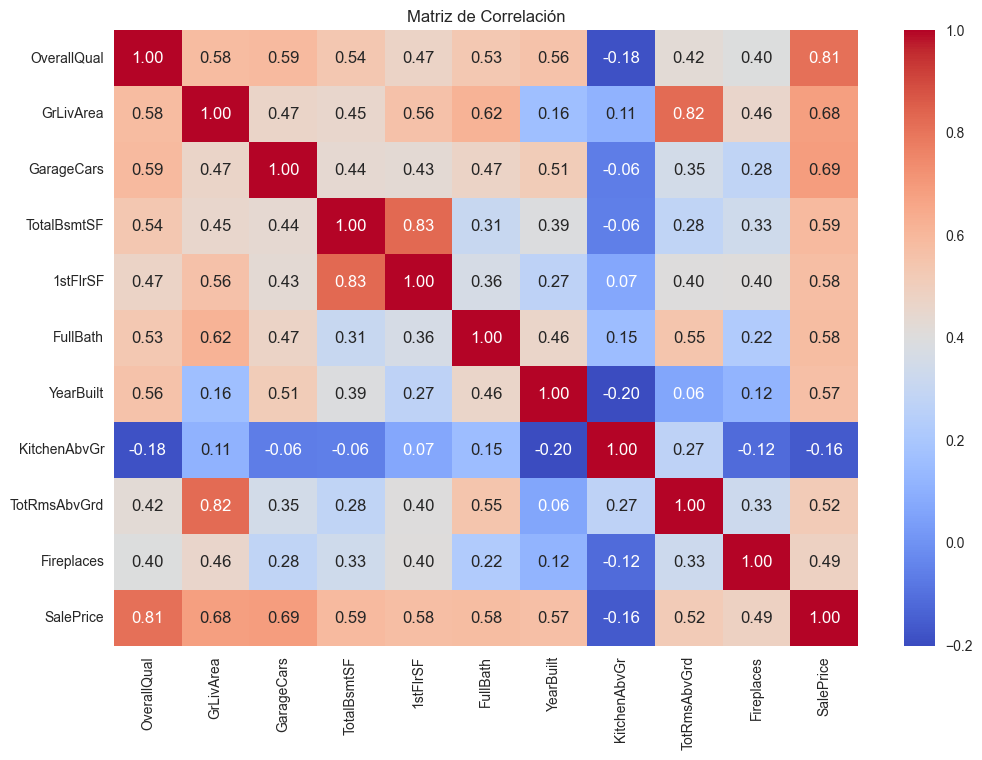

In [110]:
correlacion = X_train.join(y_train).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

<small>

### **Análisis de Correlación**

A continuación, se muestra la matriz de correlación entre las variables seleccionadas:

#### **Análisis:**

- Se observan correlaciones muy altas entre:
  - **1stFlrSF** y **TotalBsmtSF** con un coeficiente de **0.83**.
  - **GrLivArea** y **TotRmsAbvGrd** con un coeficiente de **0.82**.
- Esto indica que estas variables aportan información redundante al modelo. Por lo tanto, para evitar problemas de **multicolinealidad**, es recomendable eliminar una de cada par de variables correlacionadas.

#### **Selección de Variables para el Modelo Final**

Con base en el análisis, se decidió eliminar las siguientes variables:

- **1stFlrSF:** Su alta correlación con **TotalBsmtSF** la hace redundante. Se conserva **TotalBsmtSF** por ser una medida más completa del área construida.
- **TotRmsAbvGrd:** Su alta correlación con **GrLivArea** la hace redundante. Se conserva **GrLivArea** porque mide el área habitable de manera continua y directa.

#### **Justificación**

- La **multicolinealidad** afecta la interpretación de los coeficientes y puede generar inestabilidad numérica en el modelo.
- Al reducir variables redundantes, el modelo es más interpretable, eficiente y menos propenso a sobreajuste.

#### **Variables Finales Seleccionadas**

| Variable     | Descripción                              |
| ------------ | ---------------------------------------- |
| OverallQual  | Calidad general de la construcción       |
| GrLivArea    | Área habitable sobre tierra              |
| GarageCars   | Cantidad de autos que caben en el garaje |
| TotalBsmtSF  | Área total del sótano                    |
| FullBath     | Cantidad de baños completos              |
| YearBuilt    | Año de construcción                      |
| KitchenAbvGr | Cantidad de cocinas sobre tierra         |
| Fireplaces   | Cantidad de chimeneas                    |

#### **Conclusión**

El modelo final utilizará únicamente estas 8 variables, eliminando aquellas que introducen **colinealidad excesiva**. Con esto, se mejora la interpretabilidad y se reduce el riesgo de problemas numéricos al ajustar el modelo.

</small>


#### ¿Hay overfitting?


<small>

El modelo fue validado usando **Cross-Validation**, obteniendo los siguientes resultados:

Cross-validation scores: [0.8867, 0.8582, 0.7589, 0.8311, 0.8821]

Promedio de CV score: 0.8434

Esto indica que:

- El desempeño es razonablemente consistente entre los diferentes folds, aunque se observa una ligera caída en uno de los pliegues (0.7589), lo cual podría sugerir cierta sensibilidad a variaciones específicas en los datos.
- Comparando con el R² de entrenamiento (0.84), el promedio de validación cruzada es muy similar (0.8434), lo cual es una señal positiva, ya que implica que el modelo generaliza bien a datos no vistos.
- **No hay evidencia fuerte de overfitting severo**, ya que el desempeño fuera de muestra es comparable al desempeño en el set de entrenamiento.
- Sin embargo, la ligera variación entre los pliegues podría estar reflejando que el modelo es algo sensible a la segmentación de los datos, posiblemente debido a la presencia de outliers o diferencias estructurales entre subgrupos de propiedades.

En general, los resultados sugieren que el modelo es bastante estable, con buena capacidad de generalización y sin signos claros de sobreajuste.

</small>


#### Modelo MRL Multivariable Eliminando Variables con Colinealidad Excesiva


In [158]:
train = pd.read_csv("train.csv")  

variables_clave = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'KitchenAbvGr', 'Fireplaces'
]

X = train[variables_clave]
y = np.log(train['SalePrice'])

#### División entre train (70%) y test (30%)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#### Ajuste de modelo de regresión lineal


In [160]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

#### Predicción sobre el test set


In [161]:
y_pred = modelo.predict(X_test)

#### Coeficiente (y = mx + c)


In [162]:
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo.coef_
})
print("Coeficientes:")
print(coef_df)

Coeficientes:
       Variable  Coeficiente
0   OverallQual     0.090895
1     GrLivArea     0.000205
2    GarageCars     0.104273
3   TotalBsmtSF     0.000078
4      FullBath     0.019748
5     YearBuilt     0.002271
6  KitchenAbvGr    -0.134356
7    Fireplaces     0.069402


#### Gráfico de dispersión sobre la recta de regresión


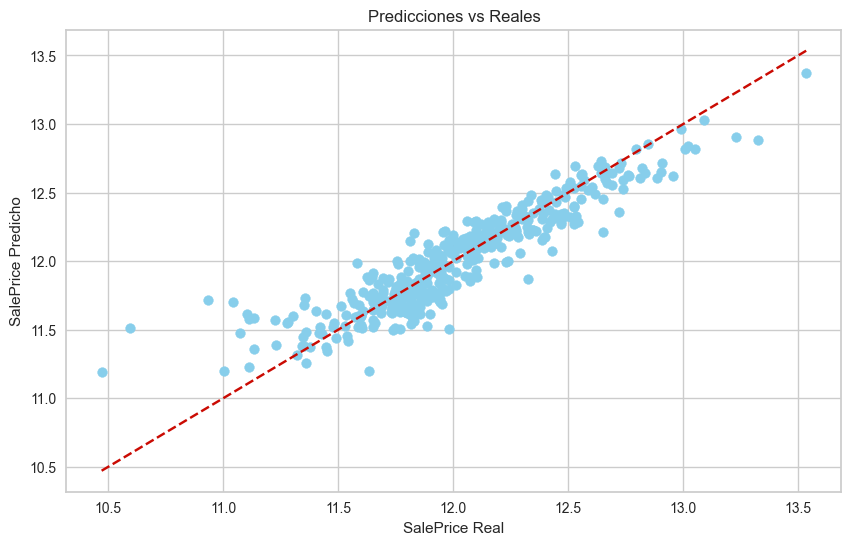

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred[:len(y_test)], color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("SalePrice Real")
plt.ylabel("SalePrice Predicho")
plt.title("Predicciones vs Reales")
plt.grid(True)
plt.show()

#### Métrica de evaluación


In [165]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("R squared: %.2f" % r2_score(y_test, y_pred))

Mean Squared Error: 0.03
R squared: 0.84


#### Cálculo y muestra de residuales


In [166]:
for i in range(len(y_test)):
    print(y_test.iloc[i], y_pred[i], " --> ", "\t\tDIFF:", y_test.iloc[i] - y_pred[i])

11.947949375319936 11.774864987851835  -->  		DIFF: 0.1730843874681014
12.691580461311874 12.640475149047695  -->  		DIFF: 0.05110531226417869
11.652687407345388 11.763696877738036  -->  		DIFF: -0.11100947039264852
11.976659481202368 12.119462300269447  -->  		DIFF: -0.1428028190670787
12.661913960963405 12.602222558716395  -->  		DIFF: 0.05969140224700986
11.231887935237117 11.3858871520139  -->  		DIFF: -0.15399921677678385
12.649154617209645 12.215953099851205  -->  		DIFF: 0.43320151735843915
11.891361900690473 12.066148460279067  -->  		DIFF: -0.17478655958859335
11.344506813345266 11.381344832453603  -->  		DIFF: -0.036838019108337505
11.816726919301892 11.713618967952804  -->  		DIFF: 0.10310795134908801
11.884489021402711 11.943992858618813  -->  		DIFF: -0.059503837216102085
11.77528972943772 11.640300555691663  -->  		DIFF: 0.13498917374605668
11.302204433654575 11.598550413634513  -->  		DIFF: -0.2963459799799377
12.273731294003989 12.214466863631259  -->  		DIFF: 0.0592644

#### Diferencia máxima


In [142]:
differences = [abs(t - p) for t, p in zip(y_test, y_pred)]

max_index = differences.index(max(differences))

max_real_value = y_test.iloc[max_index]
max_pred_value = y_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 197
Valor real: 10.596634733096073
Valor predicho: 11.514620944819793
Diferencia máxima: 0.9179862117237203


### Visualización de residuales


#### Gráfico de residuales


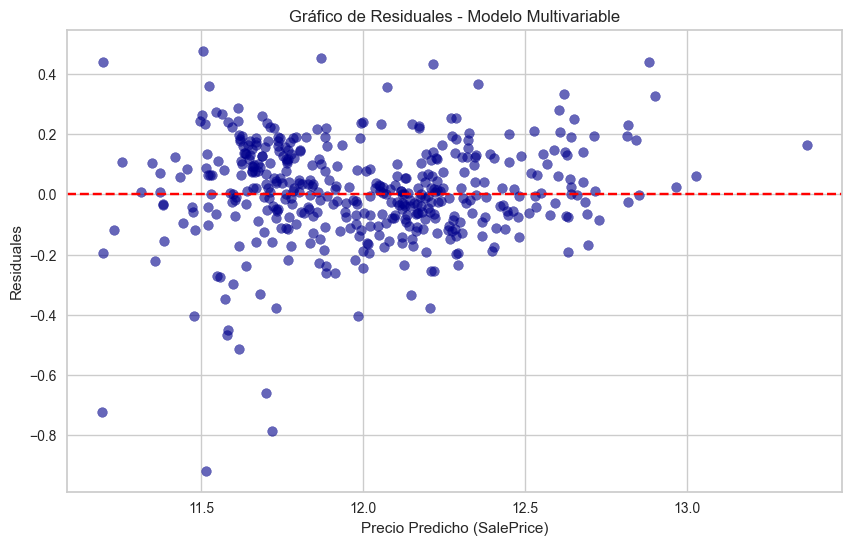

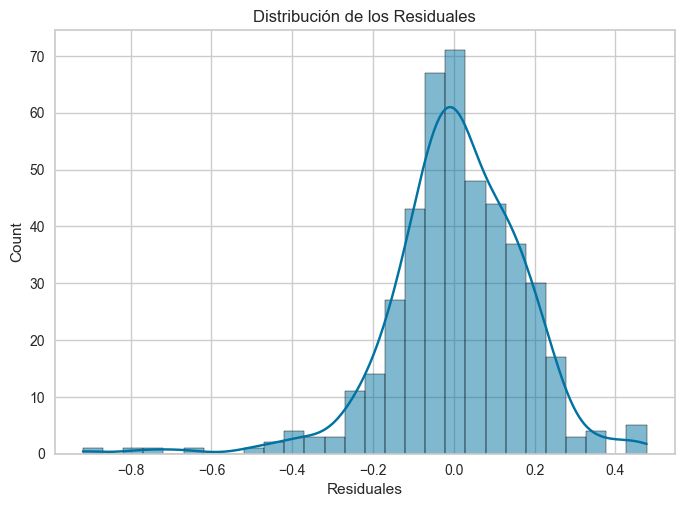

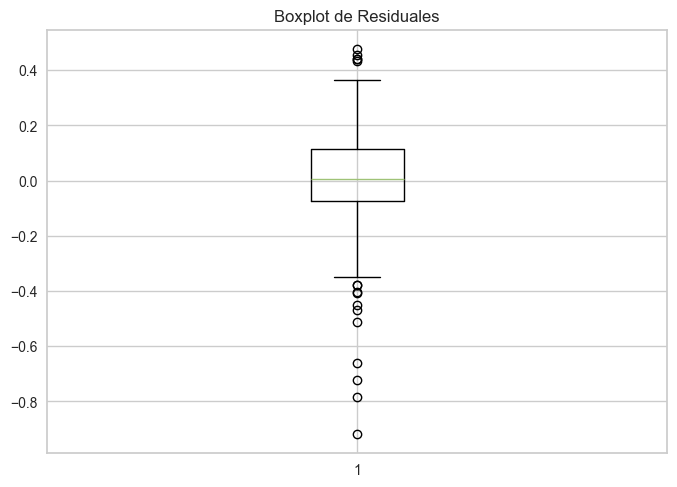

In [143]:
residuales = y_test - y_pred
len(residuales)

# Gráfico de residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuales, color='darkblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuales - Modelo Multivariable")
plt.xlabel("Precio Predicho (SalePrice)")
plt.ylabel("Residuales")
plt.grid(True)
plt.show()

# Histograma de residuales

sns.histplot(residuales, kde=True)  
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Boxplot de residuales

plt.boxplot(residuales)
plt.title("Boxplot de Residuales")
plt.show()

#### Prueba de normalidad de residuos


In [144]:
normaltest(residuales)

NormaltestResult(statistic=np.float64(101.19242400159649), pvalue=np.float64(1.062537637874344e-22))

#### Yellowbrick de residuales


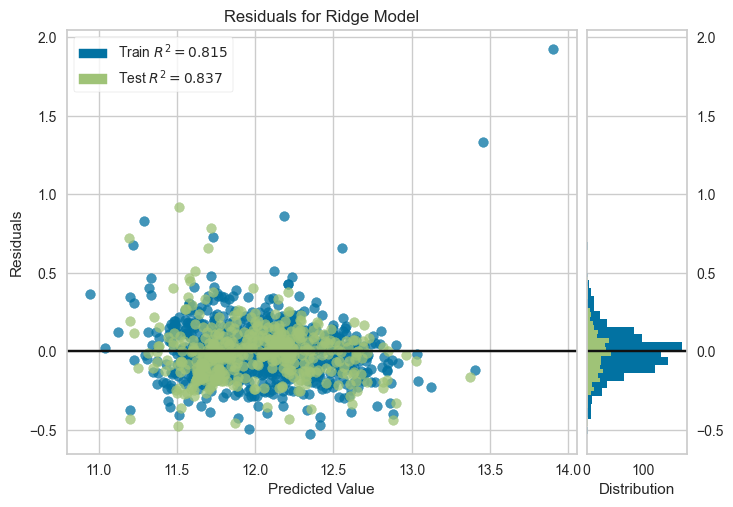

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [145]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### Análisis de coeficientes


In [146]:
X_with_const = sm.add_constant(X)

est = sm.OLS(y, X_with_const)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     847.7
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:36:55   Log-Likelihood:                 535.80
No. Observations:                1460   AIC:                            -1054.
Df Residuals:                    1451   BIC:                            -1006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3222      0.405     15.626   

#### Agregando intercepto


In [147]:
X_with_const = sm.add_constant(X) 
est = sm.OLS(y, X_with_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     847.7
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:36:57   Log-Likelihood:                 535.80
No. Observations:                1460   AIC:                            -1054.
Df Residuals:                    1451   BIC:                            -1006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3222      0.405     15.626   

#### Detección de overfitting


In [148]:
model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.88744978 0.86000549 0.75748124 0.83292805 0.8811013 ]
Mean score: 0.8437931723071612


#### Análisis de Correlación entre Características


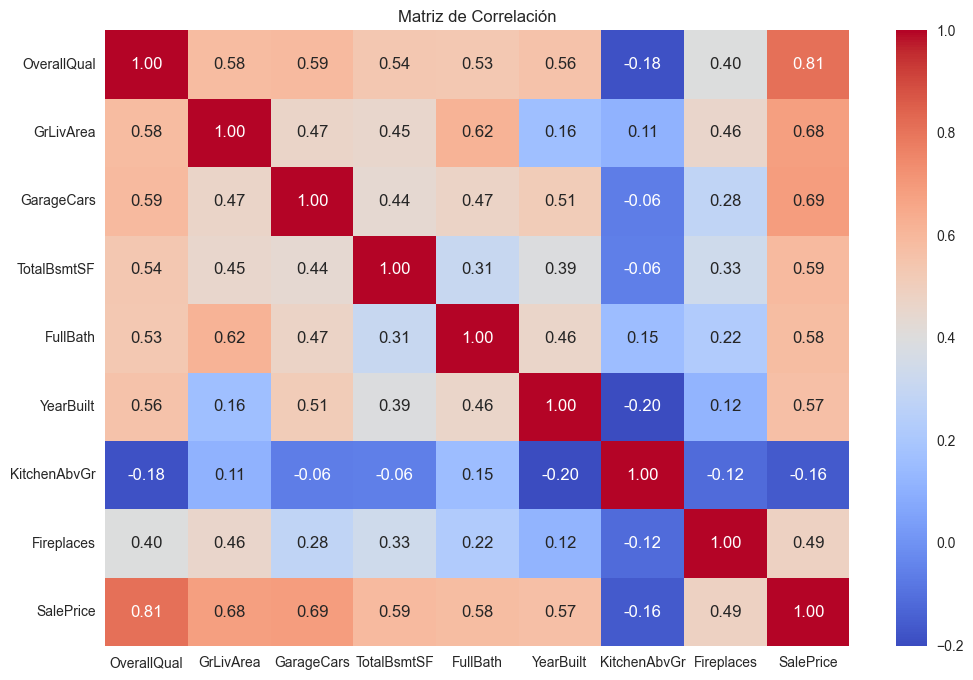

In [149]:
correlacion = X_train.join(y_train).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#### Análisis final de MRL Multivariable


<small>

### **Contexto de la Modificación**

En la etapa inicial, el modelo de regresión lineal multivariable incluyó 10 variables predictoras. Sin embargo, el análisis de la matriz de correlación mostró que algunas de estas variables presentaban correlaciones muy altas entre sí, lo que introducía multicolinealidad. La multicolinealidad afecta directamente la estabilidad de los coeficientes, dificultando la interpretación y volviendo al modelo más sensible a pequeñas variaciones en los datos de entrada. Por esta razón, se decidió realizar un proceso de eliminación de variables redundantes, conservando únicamente las variables más representativas.

Variables eliminadas:

- 1stFlrSF (debido a su alta correlación con TotalBsmtSF).
- TotRmsAbvGrd (debido a su alta correlación con GrLivArea).

### **Resultados Tras la Eliminación**

**Desempeño Global**

Tras la eliminación de estas variables, el nuevo modelo muestra un R² de 0.84, muy similar al modelo inicial (0.84). Esto confirma que las variables eliminadas no aportaban información sustancial adicional y que su eliminación no afecta significativamente el poder explicativo del modelo.
El error cuadrático medio (MSE) se mantiene en 0.03, lo que indica que el nivel general de error tampoco se vio afectado.

**Comparativa de Coeficientes**

Los coeficientes de las variables restantes mostraron ligeros ajustes al eliminar las variables colineales, lo cual es esperable, ya que al reducir la redundancia, el modelo redistribuye mejor la influencia de cada predictor.

Por ejemplo:

- GrLivArea aumentó su coeficiente (de 0.000151 a 0.000205), indicando que ahora captura mejor la relación con el precio, al no compartir carga explicativa con TotRmsAbvGrd.
- TotalBsmtSF pasó de 0.000045 a 0.000078, ganando también relevancia al eliminar la redundancia con 1stFlrSF.

**Análisis de Multicolinealidad**

La condición del modelo mejoró ligeramente, pasando de 2.76e+05 a 2.51e+05. Aunque sigue siendo alto, esta mejora es evidencia de que la eliminación de variables redundantes redujo parcialmente la multicolinealidad. Sin embargo, aún persiste cierta colinealidad residual, lo que puede estar relacionado con la naturaleza de los datos inmobiliarios, donde muchas variables (áreas, habitaciones, calidad) tienen correlaciones naturales entre sí.

**Análisis de Residuales y Normalidad**

El comportamiento de los residuales se mantuvo similar, con una distribución aproximadamente normal, aunque la prueba de normalidad sigue indicando una desviación significativa respecto a la normalidad perfecta (p-value extremadamente bajo). Esto es común en datos de precios inmobiliarios, por lo que no representa un problema crítico. Sin embargo, la ligera reducción en el skew (asimetría) y la mejora leve en la forma de la distribución de residuales son signos positivos.

**Validación Cruzada y Generalización**

La evaluación por validación cruzada muestra un comportamiento muy consistente:

Cross-validation scores: [0.8874, 0.8600, 0.7575, 0.8329, 0.8811]
Promedio: 0.8438

Esto representa una mejora leve respecto al promedio anterior (0.8434), lo cual sugiere que el modelo es ligeramente más estable al remover colinealidad innecesaria. Además, la variación entre folds es ahora marginalmente menor, lo cual también indica que el modelo es menos sensible a cómo se dividen los datos.

### **Interpretación Mejorada**

Al eliminar variables colineales, la interpretación de los coeficientes es más confiable. Ahora, cada coeficiente representa mejor la relación directa entre la variable y el precio de la vivienda, sin interferencias artificiales generadas por redundancias. Por ejemplo, ahora es claro que GrLivArea tiene un impacto positivo directo, sin necesidad de ajustar por una variable redundante como TotRmsAbvGrd.

</small>
